<a href="https://colab.research.google.com/github/georgezefko/Recommender_System/blob/main/Exploratory_Data_Analysis_Deepthi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import seaborn as sns
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
from nltk import sent_tokenize
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [14]:
path ='/content/drive/MyDrive/olist_project'
#path = '/content/drive/MyDrive/AdvancedBA/Olie_data/archive' #adust this one to yours
customers = pd.read_csv(path +'/olist_customers_dataset.csv')
reviews = pd.read_csv(path+'/olist_order_reviews_dataset.csv')
geolocation = pd.read_csv(path+'/olist_geolocation_dataset.csv')
items = pd.read_csv(path + '/olist_order_items_dataset.csv')
payments  = pd.read_csv(path + '/olist_order_payments_dataset.csv')
orders= pd.read_csv(path + '/olist_orders_dataset.csv')
products = pd.read_csv(path + '/olist_products_dataset.csv')
sellers =pd.read_csv(path + '/olist_sellers_dataset.csv')
category =  pd.read_csv(path + '/product_category_name_translation.csv')


In [15]:
#merge datasets

data = pd.merge(orders,customers,on='customer_id')
data = pd.merge(data,reviews,on='order_id')
data = pd.merge(data,payments,on='order_id')
data = pd.merge(data,items,on='order_id')
data = pd.merge(data,products,on='product_id')
data = pd.merge(data,sellers,on='seller_id')
data = pd.merge(data,geolocation,left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
data = pd.merge(data, category,on ='product_category_name')
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,9350,-23.680114,-46.452454,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,9350,-23.675223,-46.441038,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,9350,-23.685712,-46.444796,mauá,SP,housewares
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,9350,-23.679951,-46.448247,maua,SP,housewares
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,9350,-23.678662,-46.442578,maua,SP,housewares


In [ ]:

#check for null values (values shown as percentage) Note: it requires high RAM
round(data.isnull().sum()/len(data)*100,2)


order_id                          0.00
customer_id                       0.00
order_status                      0.00
order_purchase_timestamp          0.00
order_approved_at                 0.01
order_delivered_carrier_date      1.04
order_delivered_customer_date     2.13
order_estimated_delivery_date     0.00
customer_unique_id                0.00
customer_zip_code_prefix          0.00
customer_city                     0.00
customer_state                    0.00
review_id                         0.00
review_score                      0.00
review_comment_title             88.45
review_comment_message           57.10
review_creation_date              0.00
review_answer_timestamp           0.00
payment_sequential                0.00
payment_type                      0.00
payment_installments              0.00
payment_value                     0.00
order_item_id                     0.00
product_id                        0.00
seller_id                         0.00
shipping_limit_date      

In [84]:
#choose columns to explore relevant to recommender system

recommender = data[['review_score','price','customer_state','order_status','seller_state','order_item_id','product_category_name_english','customer_unique_id','order_purchase_timestamp','geolocation_lat','geolocation_lng']]

In [85]:
recommender.head()

,review_score,price,customer_state,order_status,seller_state,order_item_id,product_category_name_english,customer_unique_id,order_purchase_timestamp,geolocation_lat,geolocation_lng
0,4,29.99,SP,delivered,SP,1,housewares,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,-23.680114,-46.452454
1,4,29.99,SP,delivered,SP,1,housewares,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,-23.675223,-46.441038
2,4,29.99,SP,delivered,SP,1,housewares,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,-23.685712,-46.444796
3,4,29.99,SP,delivered,SP,1,housewares,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,-23.679951,-46.448247
4,4,29.99,SP,delivered,SP,1,housewares,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,-23.678662,-46.442578


In [ ]:
recommender.isnull().sum()

review_score                     0
price                            0
customer_state                   0
order_status                     0
seller_state                     0
order_item_id                    0
product_category_name_english    0
customer_unique_id               0
dtype: int64

In [ ]:
recommender['review_score'].value_counts().sort_values(ascending=False)
                                                

5    9421600
4    3157851
1    2195829
3    1466844
2     607344
Name: review_score, dtype: int64

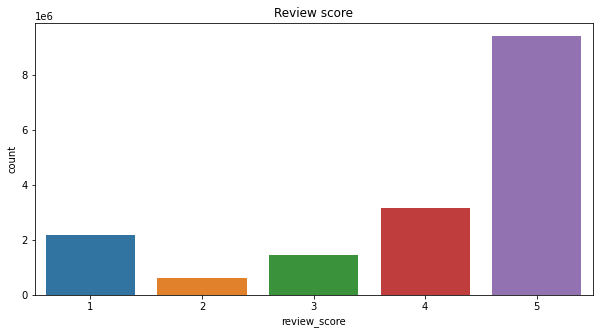

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=recommender['review_score'])
plt.title('Review score')
plt.show()

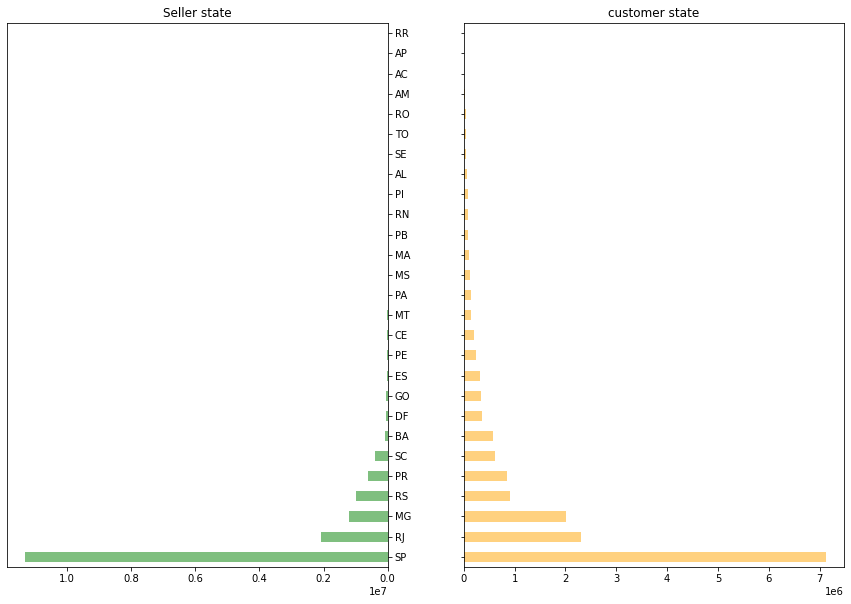

In [ ]:

fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(15,10))

ax.invert_xaxis()
ax.yaxis.tick_right()

recommender['seller_state'].value_counts().plot(kind='barh', x='LABEL',  legend=False, ax=ax,title = 'Seller state', facecolor = 'green',alpha=0.5)
recommender['customer_state'].value_counts().plot(kind='barh', x='LABEL',ax=ax2, title = 'customer state',facecolor ='orange',alpha=0.5)
plt.show()

In [ ]:
#plots by review

In [ ]:
def by_review(df):
  fields = df.columns.tolist()
  colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748', '#7f7f7f']
  labels = ['1', '2', '3', '4','5']

  # figure and axis
  fig, ax = plt.subplots(1, figsize=(15, 15))
  # plot bars
  left = len(df) * [0]
  for idx, name in enumerate(fields):
      plt.barh(df.index, df[name], left = left, color=colors[idx])
      left = left + df[name]
  # title, legend, labels
  plt.title(df.index.name, loc='left')
  plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
  plt.xlabel('No of reviews')
  # remove spines
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  # adjust limits and draw grid lines
  plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
  ax.set_axisbelow(True)
  ax.xaxis.grid(color='gray', linestyle='dashed')
  plt.show()

In [ ]:

df_seller = recommender.groupby(['seller_state', 'review_score']).size().unstack()
df_seller.fillna(0,inplace=True)
df_seller = df_seller.sort_values(df_seller.columns.tolist()[4], ascending=True)

In [ ]:
df_customer = recommender.groupby(['customer_state', 'review_score']).size().unstack()
df_customer.fillna(0,inplace=True)
df_customer = df_customer.sort_values(df_customer.columns.tolist()[4], ascending=True)

In [ ]:
df_products = recommender.groupby(['product_category_name_english', 'review_score']).size().unstack()
df_products.fillna(0,inplace=True)
df_products = df_products.sort_values(df_products.columns.tolist()[4], ascending=True)

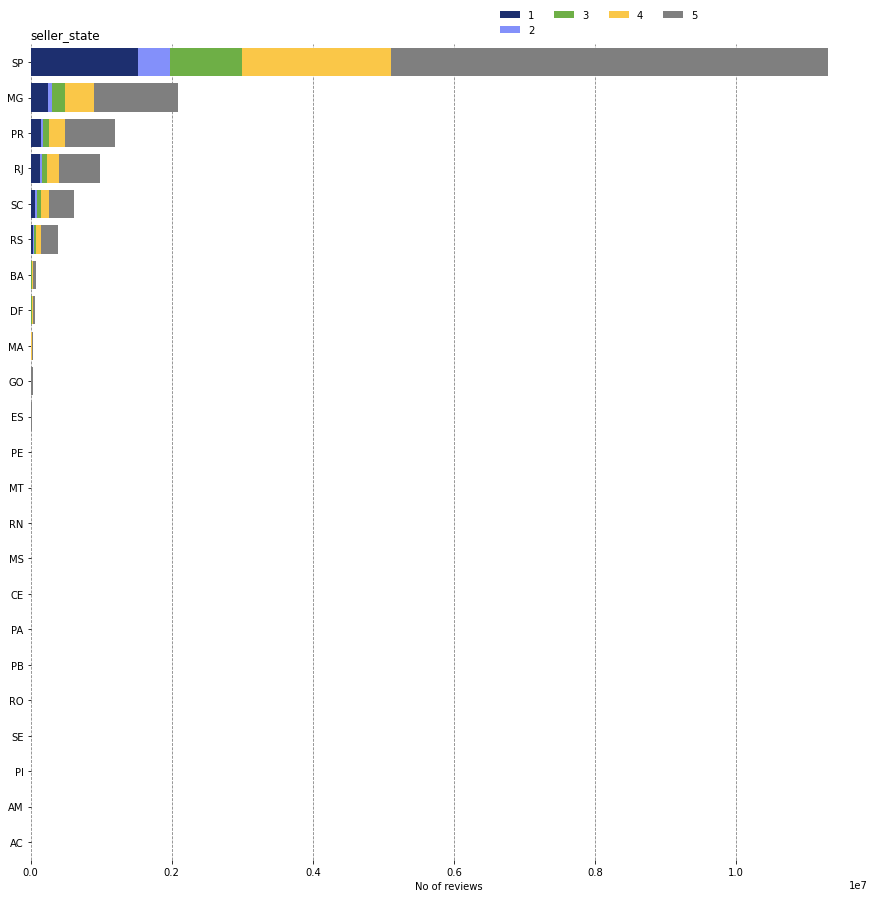

In [ ]:
by_review(df_seller)

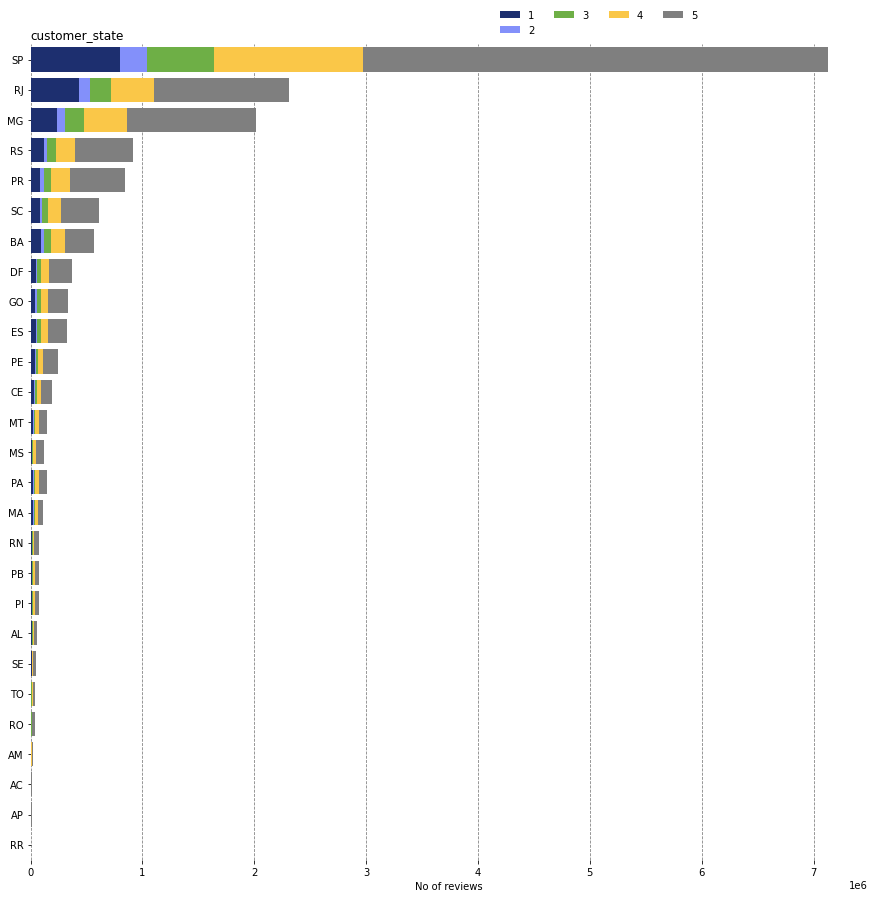

In [ ]:
by_review(df_customer)

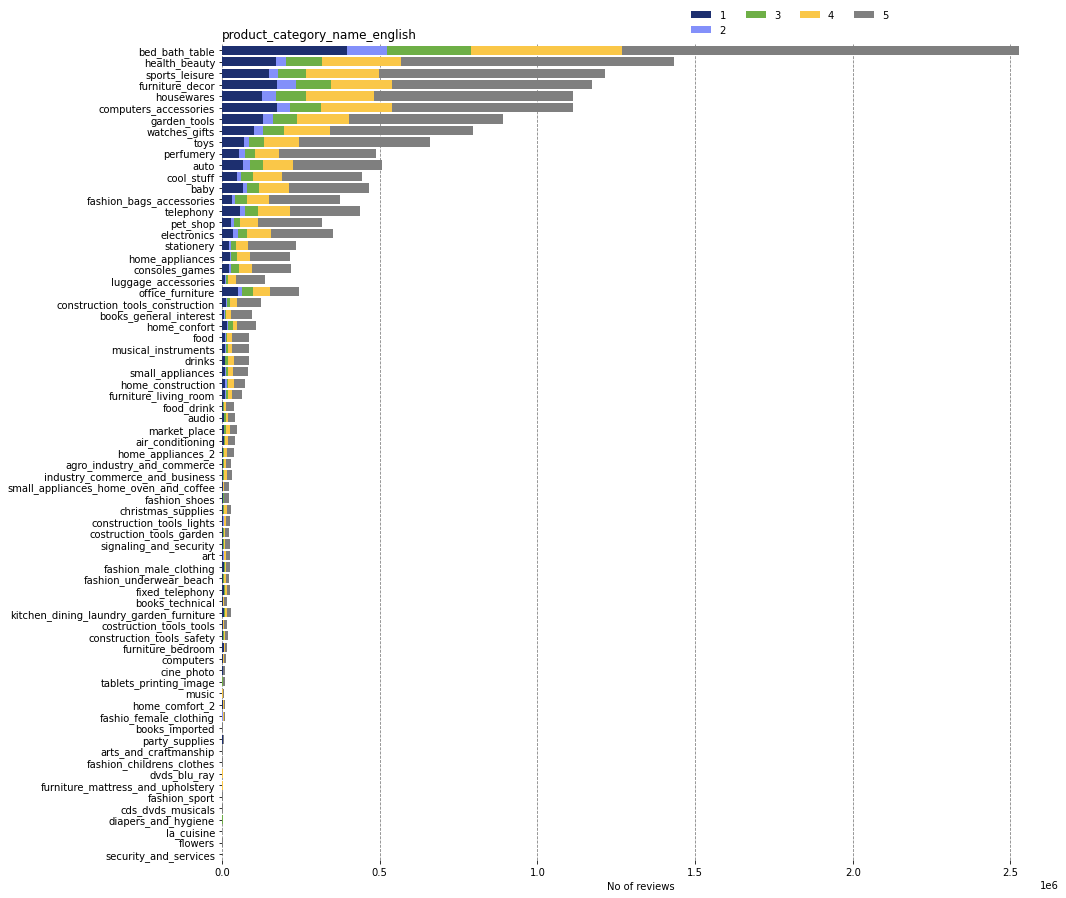

In [ ]:
by_review(df_products)

In [66]:
df_status = recommender.groupby(['order_status','review_score']).size().unstack()

In [ ]:
df_status.fillna(0,inplace=True)
df_status = df_status.sort_values(df_status.columns.tolist()[4], ascending=True)

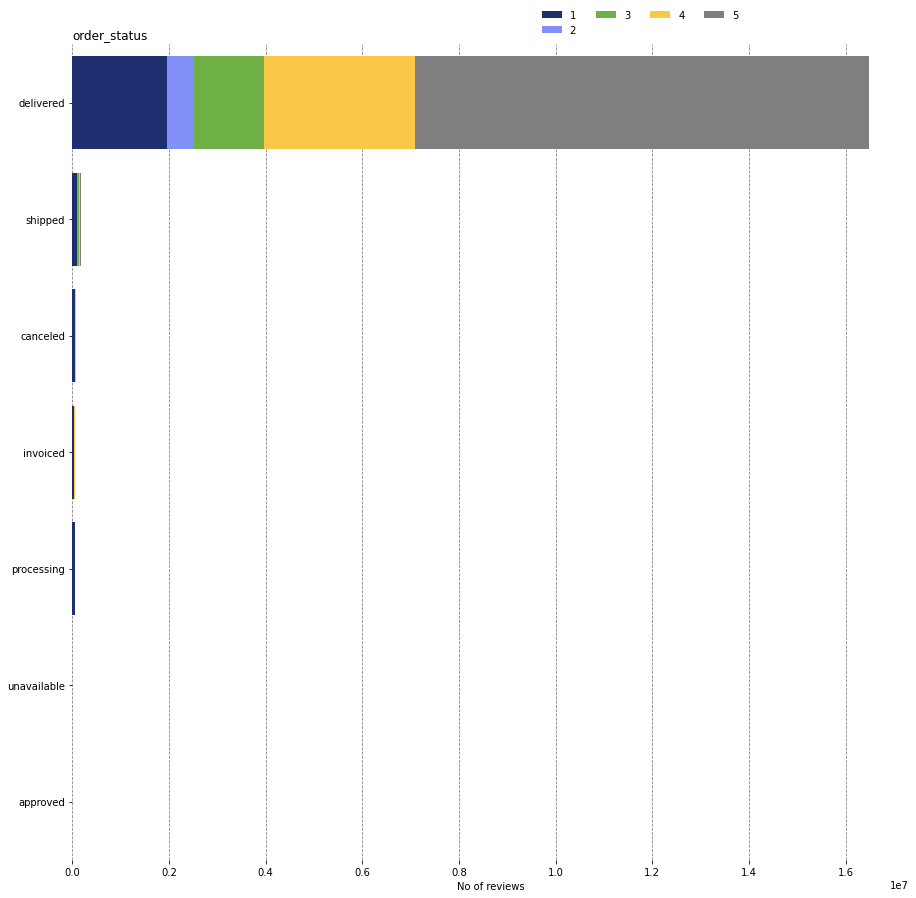

In [ ]:
by_review(df_status)

In [86]:
#The amount of data is huge and requires a lot of memory to run calculations let's keep only the mid top 20 (eg from 20-40)
#The first 20 ones is still huge amount of data
products = recommender['product_category_name_english'].value_counts().sort_values(ascending=False).reset_index().iloc[20:39,0].tolist()
products

['home_appliances',
 'luggage_accessories',
 'construction_tools_construction',
 'home_confort',
 'books_general_interest',
 'drinks',
 'food',
 'musical_instruments',
 'small_appliances',
 'home_construction',
 'furniture_living_room',
 'market_place',
 'audio',
 'air_conditioning',
 'food_drink',
 'home_appliances_2',
 'industry_commerce_and_business',
 'christmas_supplies',
 'agro_industry_and_commerce']

In [87]:
scores = recommender['review_score'].unique().tolist()

In [88]:
#reduce the dataset by keeping only the selected products
# keep only a sample of each rating for the selected products
frames = []
for i in products:

  df = recommender.loc[recommender['product_category_name_english'] == i]

  for j in sorted(scores):

    length = len(df[df['review_score']==j])//20
    reduced = df[df['review_score']==j].iloc[:length]
    frames.append(reduced)
  


In [89]:
sample = pd.concat(frames)
sample.head()

,review_score,price,customer_state,order_status,seller_state,order_item_id,product_category_name_english,customer_unique_id,order_purchase_timestamp,geolocation_lat,geolocation_lng
16295719,1,41.29,SP,canceled,SP,1,home_appliances,595e4f5543fcf93e124729bc947ca896,2018-02-17 09:59:29,-23.677741,-46.668647
16295720,1,41.29,SP,canceled,SP,1,home_appliances,595e4f5543fcf93e124729bc947ca896,2018-02-17 09:59:29,-23.676303,-46.668801
16295721,1,41.29,SP,canceled,SP,1,home_appliances,595e4f5543fcf93e124729bc947ca896,2018-02-17 09:59:29,-23.683332,-46.672478
16295722,1,41.29,SP,canceled,SP,1,home_appliances,595e4f5543fcf93e124729bc947ca896,2018-02-17 09:59:29,-23.675802,-46.670181
16295723,1,41.29,SP,canceled,SP,1,home_appliances,595e4f5543fcf93e124729bc947ca896,2018-02-17 09:59:29,-23.677500,-46.670550


In [101]:
len(sample)

72313

In [103]:
features = sample[['review_score','price','customer_state','order_status','seller_state','order_item_id','product_category_name_english','customer_unique_id','order_purchase_timestamp','geolocation_lat','geolocation_lng']]

In [104]:
# Check for Null values
N_null = sum(features.isnull().sum())
print('The raw_dataset contains {} null values.'.format(N_null))


The raw_dataset contains 0 null values.


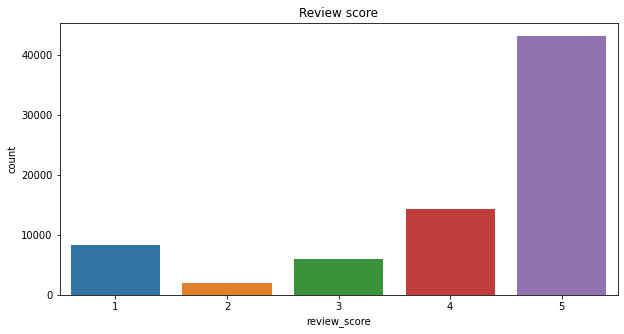

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=sample['review_score'])
plt.title('Review score')
plt.show()

In [ ]:
df_products = sample.groupby(['product_category_name_english', 'review_score']).size().unstack()
df_products.fillna(0,inplace=True)
df_products = df_products.sort_values(df_products.columns.tolist()[4], ascending=True)

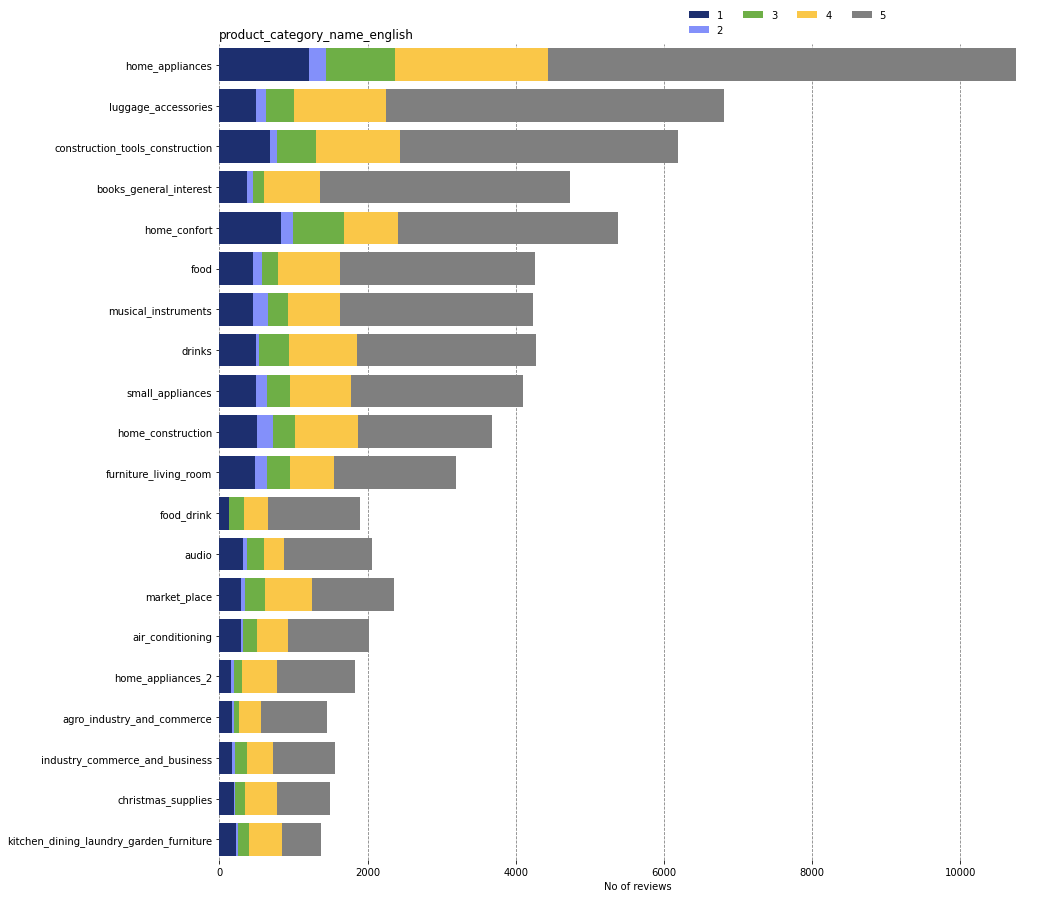

In [ ]:
by_review(df_products)

In [ ]:

#assign a unique number for the customer ids
sample = sample.assign(id=(sample['customer_unique_id']).astype('category').cat.codes)


In [ ]:
len(sample)

73691

# Order distribution by date and time

In [71]:
sample['order_purchase_timestamp'] = pd.to_datetime(sample['order_purchase_timestamp'],errors='coerce')

sample['order_date'] = sample['order_purchase_timestamp'].dt.date #get date

sample['order_time'] = sample['order_purchase_timestamp'].dt.time  #get time

sample['order_weekday'] = sample['order_purchase_timestamp'].dt.day_name() #get weekday

sample['order_year'] = sample['order_purchase_timestamp'].dt.year #get year

In [72]:
sample.head()

,review_score,price,customer_state,order_status,seller_state,order_item_id,order_id,product_category_name_english,customer_unique_id,order_purchase_timestamp,order_date,order_time,order_weekday,order_year
16295719,1,41.29,SP,canceled,SP,1,943625151a5d8d00da80e96a90930e03,home_appliances,595e4f5543fcf93e124729bc947ca896,2018-02-17 09:59:29,2018-02-17,09:59:29,Saturday,2018
16295720,1,41.29,SP,canceled,SP,1,943625151a5d8d00da80e96a90930e03,home_appliances,595e4f5543fcf93e124729bc947ca896,2018-02-17 09:59:29,2018-02-17,09:59:29,Saturday,2018
16295721,1,41.29,SP,canceled,SP,1,943625151a5d8d00da80e96a90930e03,home_appliances,595e4f5543fcf93e124729bc947ca896,2018-02-17 09:59:29,2018-02-17,09:59:29,Saturday,2018
16295722,1,41.29,SP,canceled,SP,1,943625151a5d8d00da80e96a90930e03,home_appliances,595e4f5543fcf93e124729bc947ca896,2018-02-17 09:59:29,2018-02-17,09:59:29,Saturday,2018
16295723,1,41.29,SP,canceled,SP,1,943625151a5d8d00da80e96a90930e03,home_appliances,595e4f5543fcf93e124729bc947ca896,2018-02-17 09:59:29,2018-02-17,09:59:29,Saturday,2018


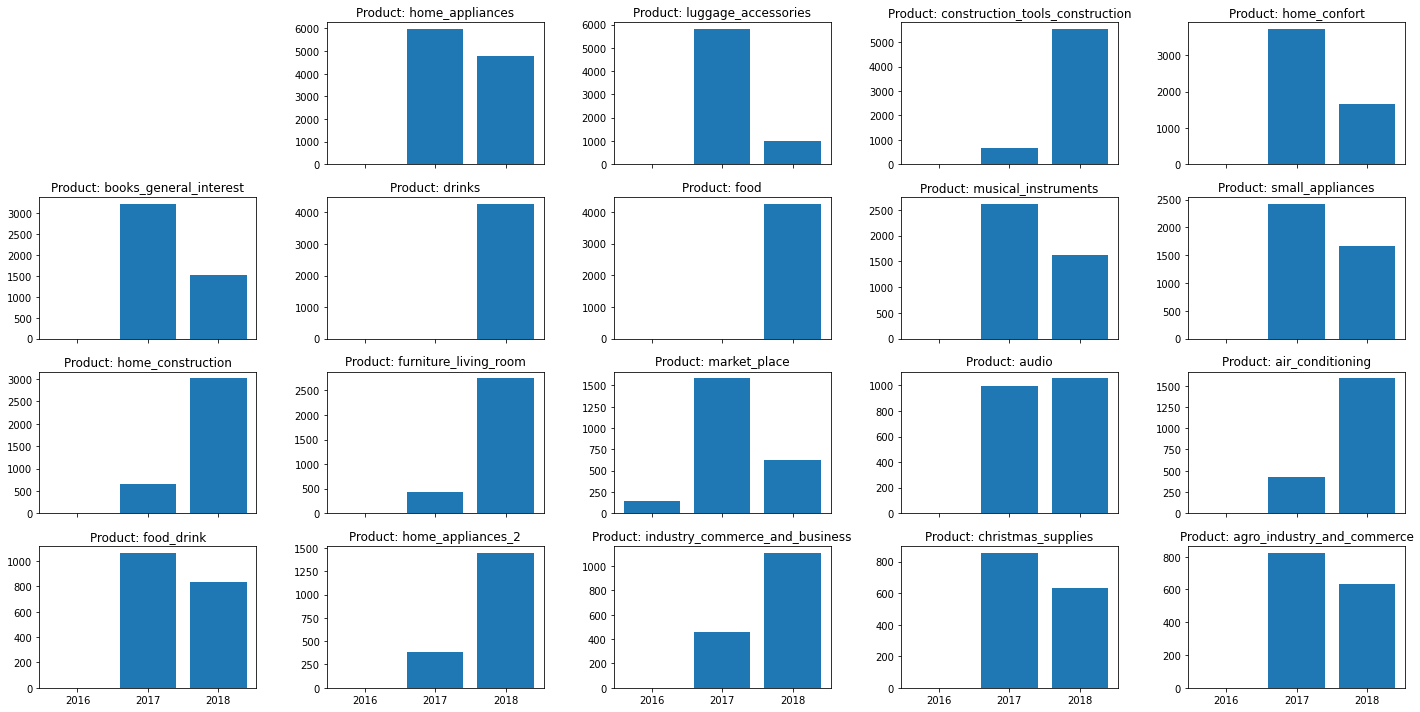

In [ ]:
#by year
f, ax = plt.subplots(4, 5, sharex = True)
f.set_figheight(10)
f.set_figwidth(20)
for i,cat in enumerate(products):
    i += 1
    axis = ax[i//5,i%5]
    by_year = sample.loc[sample['product_category_name_english'] == cat].order_year.value_counts()
    by_year.sort_index(inplace=True)
    #by_year = by_year[:-1]
    axis.title.set_text("Product: {}".format(cat))
    axis.bar(by_year.keys(),height=by_year)
    
ax[0,0].title.set_text
    
f.delaxes(ax[0,0])
f.tight_layout() 

In [ ]:
sample['order_weekday'] = sample['order_weekday'].astype('category')

In [ ]:
sample['order_weekday'].cat.reorder_categories(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], inplace = True, ordered = True)

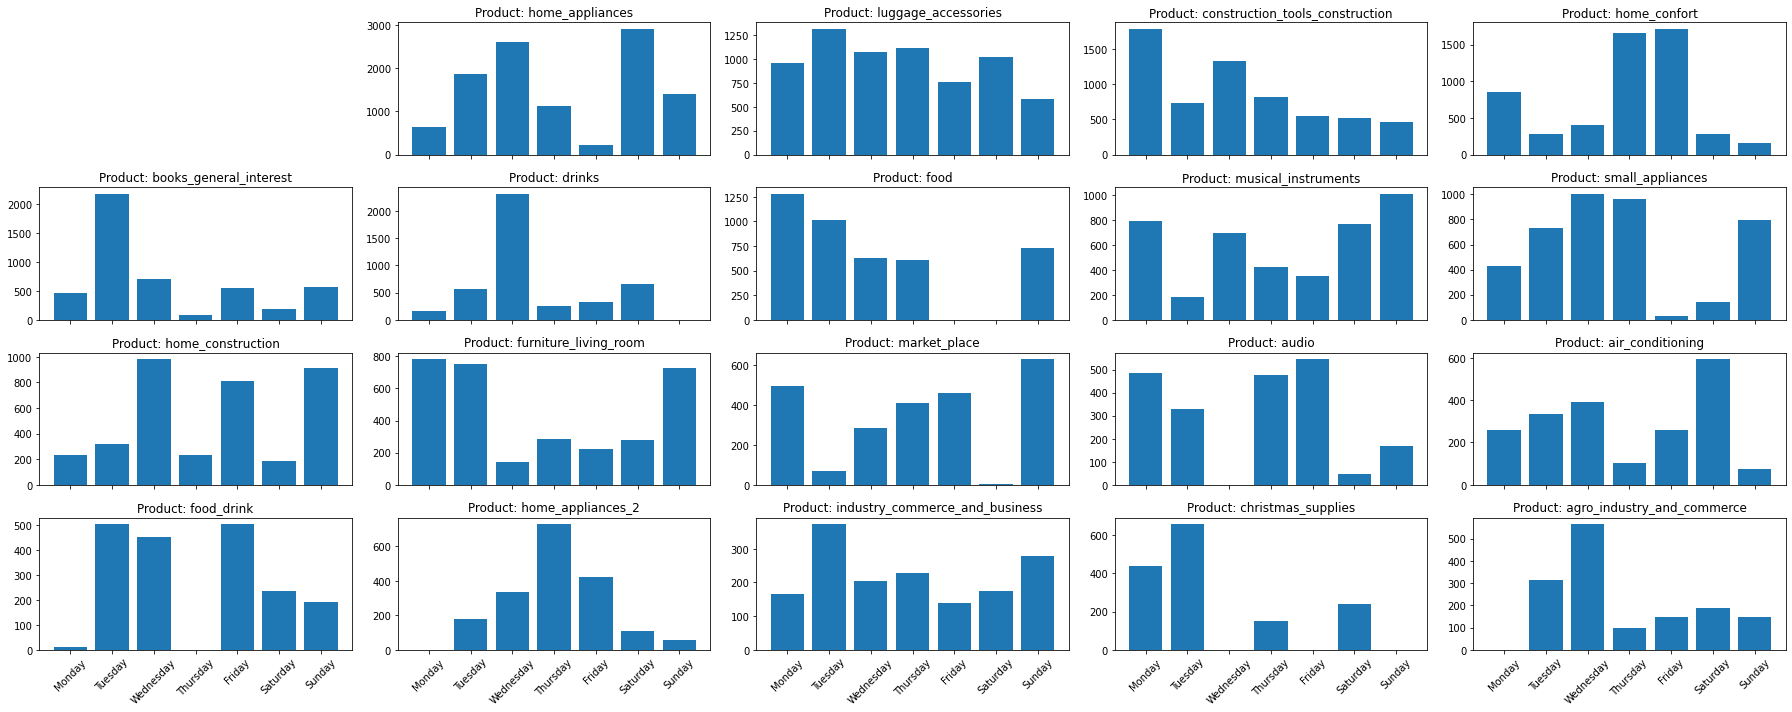

In [ ]:
#by week
f, ax = plt.subplots(4, 5, sharex = True)
f.set_figheight(10)
f.set_figwidth(25)
for i,cat in enumerate(products):
    i += 1
    axis = ax[i//5,i%5]
    by_week = sample.loc[sample['product_category_name_english'] == cat].order_weekday.value_counts()
    by_week.sort_index(inplace=True)
    axis.title.set_text("Product: {}".format(cat))
    axis.bar(by_week.keys(),height=by_week)
    axis.set_xticklabels(by_week.keys(), rotation=45)
    
ax[0,0].title.set_text
    
f.delaxes(ax[0,0])
f.tight_layout() 

In [ ]:
sample['order_month'] = sample['order_purchase_timestamp'].dt.month

In [ ]:
import calendar
sample['order_month'] = sample['order_month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
sample.head()

,review_score,price,customer_state,order_status,seller_state,order_item_id,product_category_name_english,customer_unique_id,order_purchase_timestamp,order_date,order_time,order_weekday,order_year,order_month,order_hour
16295719,1,41.29,SP,canceled,SP,1,home_appliances,595e4f5543fcf93e124729bc947ca896,2018-02-17 09:59:29,2018-02-17,09:59:29,Saturday,2018,2,9
16295720,1,41.29,SP,canceled,SP,1,home_appliances,595e4f5543fcf93e124729bc947ca896,2018-02-17 09:59:29,2018-02-17,09:59:29,Saturday,2018,2,9
16295721,1,41.29,SP,canceled,SP,1,home_appliances,595e4f5543fcf93e124729bc947ca896,2018-02-17 09:59:29,2018-02-17,09:59:29,Saturday,2018,2,9
16295722,1,41.29,SP,canceled,SP,1,home_appliances,595e4f5543fcf93e124729bc947ca896,2018-02-17 09:59:29,2018-02-17,09:59:29,Saturday,2018,2,9
16295723,1,41.29,SP,canceled,SP,1,home_appliances,595e4f5543fcf93e124729bc947ca896,2018-02-17 09:59:29,2018-02-17,09:59:29,Saturday,2018,2,9


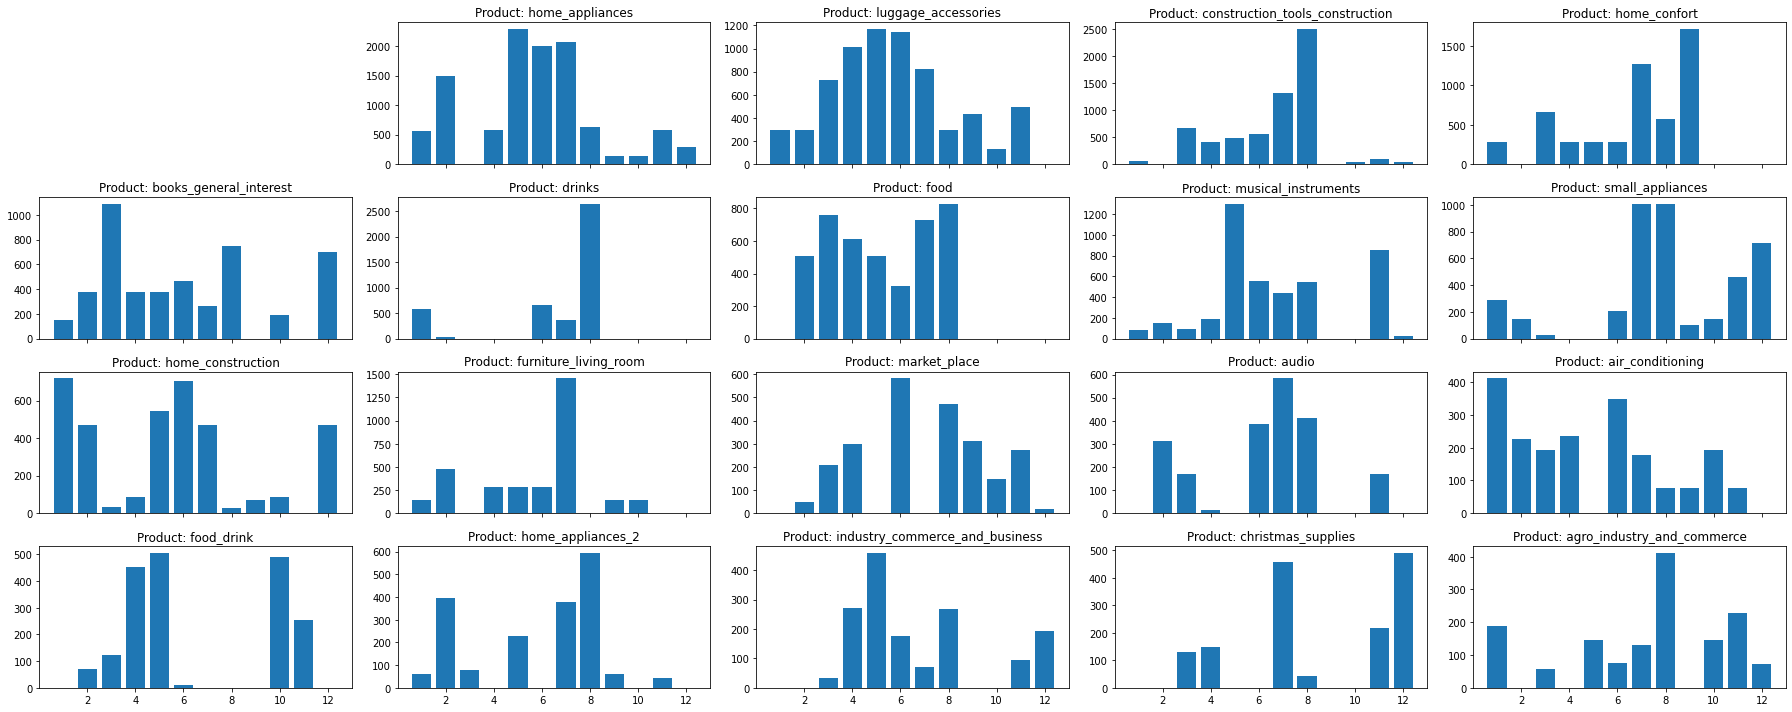

In [ ]:
#by week
f, ax = plt.subplots(4, 5, sharex = True)
f.set_figheight(10)
f.set_figwidth(25)
for i,cat in enumerate(products):
    i += 1
    axis = ax[i//5,i%5]
    by_month = sample.loc[sample['product_category_name_english'] == cat].order_month.value_counts()
    by_month.sort_index(inplace=True)
    axis.title.set_text("Product: {}".format(cat))
    axis.bar(by_month.keys(),height=by_month)
    #axis.set_xticklabels(by_month.keys(), rotation=45)
    
ax[0,0].title.set_text
    
f.delaxes(ax[0,0])
f.tight_layout() 

In [ ]:
sample['order_hour'] = sample['order_purchase_timestamp'].dt.hour
sample.head()

,review_score,price,customer_state,order_status,seller_state,order_item_id,product_category_name_english,customer_unique_id,order_purchase_timestamp,order_date,order_time,order_weekday,order_year,order_month,order_hour
16295719,1,41.29,SP,canceled,SP,1,home_appliances,595e4f5543fcf93e124729bc947ca896,2018-02-17 09:59:29,2018-02-17,09:59:29,Saturday,2018,Feb,9
16295720,1,41.29,SP,canceled,SP,1,home_appliances,595e4f5543fcf93e124729bc947ca896,2018-02-17 09:59:29,2018-02-17,09:59:29,Saturday,2018,Feb,9
16295721,1,41.29,SP,canceled,SP,1,home_appliances,595e4f5543fcf93e124729bc947ca896,2018-02-17 09:59:29,2018-02-17,09:59:29,Saturday,2018,Feb,9
16295722,1,41.29,SP,canceled,SP,1,home_appliances,595e4f5543fcf93e124729bc947ca896,2018-02-17 09:59:29,2018-02-17,09:59:29,Saturday,2018,Feb,9
16295723,1,41.29,SP,canceled,SP,1,home_appliances,595e4f5543fcf93e124729bc947ca896,2018-02-17 09:59:29,2018-02-17,09:59:29,Saturday,2018,Feb,9


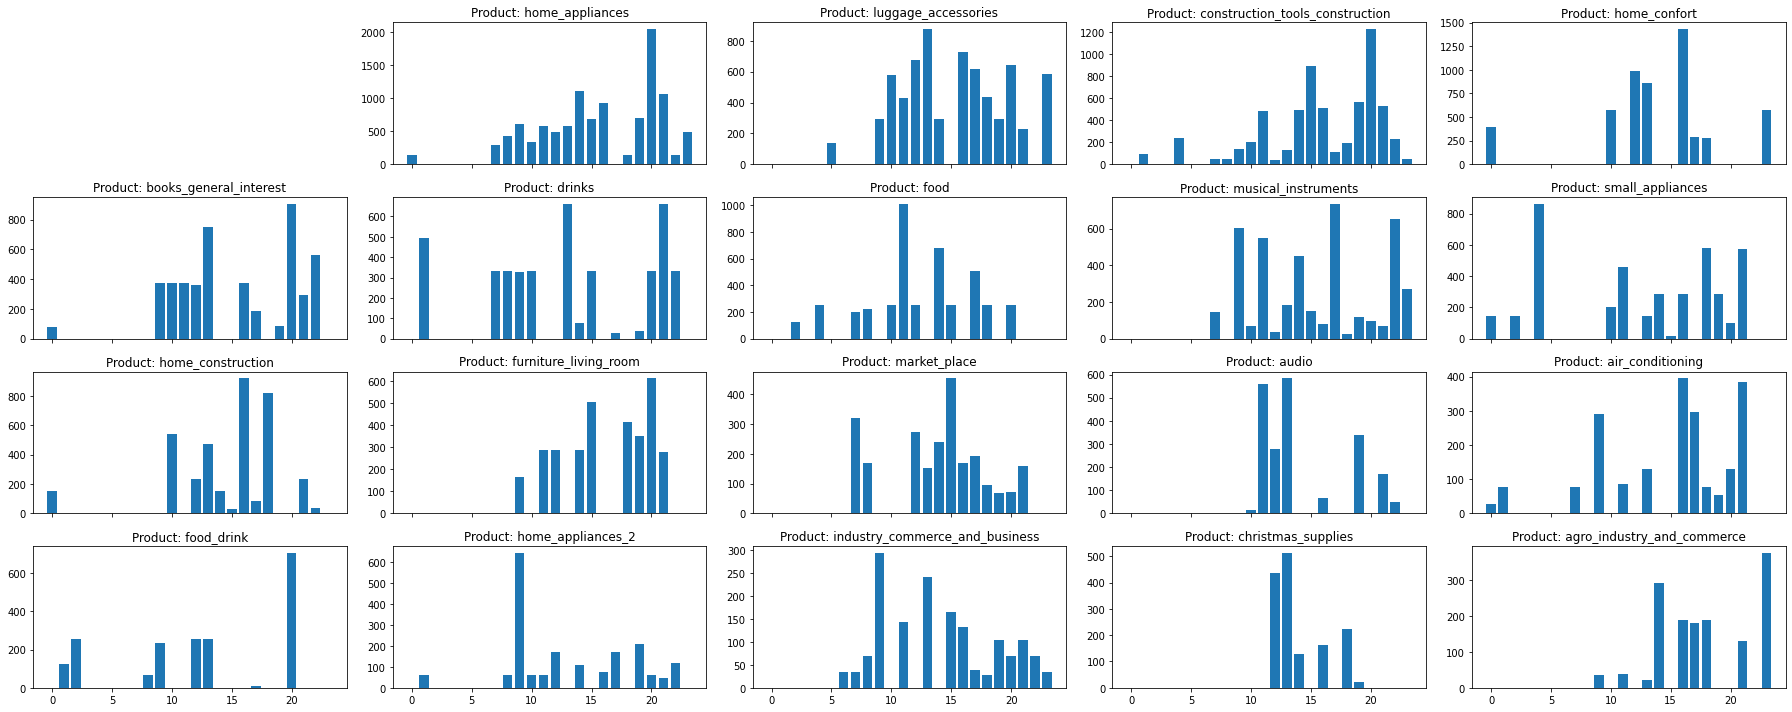

In [ ]:
#by_order hour

f, ax = plt.subplots(4, 5, sharex = True)
f.set_figheight(10)
f.set_figwidth(25)
for i,cat in enumerate(products):
    i += 1
    axis = ax[i//5,i%5]
    by_hour = sample.loc[sample['product_category_name_english'] == cat].order_hour.value_counts()
    by_hour.sort_index(inplace=True)
    axis.title.set_text("Product: {}".format(cat))
    axis.bar(by_hour.keys(),height=by_hour)
    #axis.set_xticklabels(by_month.keys(), rotation=45)
    
ax[0,0].title.set_text
    
f.delaxes(ax[0,0])
f.tight_layout()

# Daily sales distribution


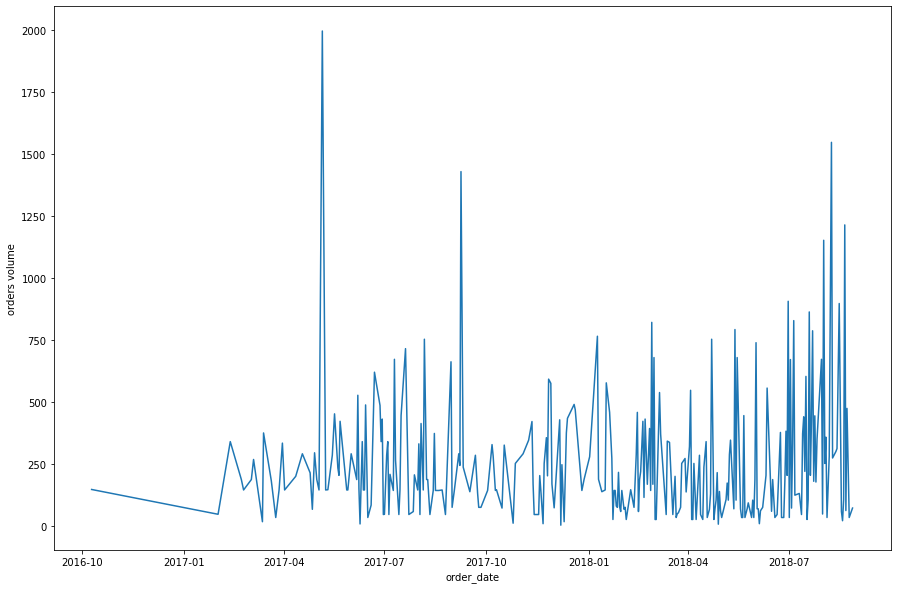

In [78]:
plt.figure(figsize=(15,10))
sample.groupby('order_date')['order_item_id'].count().plot()
plt.ylabel('orders volume')
plt.show()

In [80]:
sales_time_series = sample.groupby('order_date').count()['order_item_id']
sales_time_series[sales_time_series == sales_time_series.max()]

order_date
2017-05-06    1997
Name: order_item_id, dtype: int64

In [83]:
# São Paulo, Brazil’s vibrant financial center shows the highest sales even though its not the capital of Brazil.
city_sales_count = sample.groupby('customer_state').count()['order_item_id']
city_sales_count[city_sales_count == np.max(city_sales_count)]

customer_state
SP    32826
Name: order_item_id, dtype: int64

# Price distribution of products

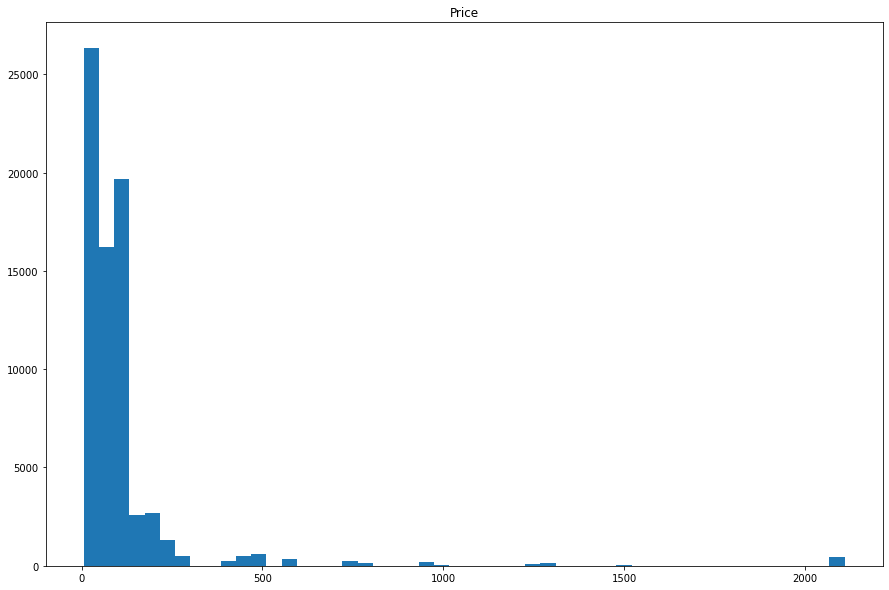

In [57]:
plt.figure(figsize=(15,10))
plt.hist(sample['price'],bins=50)
plt.title('Price')
plt.show()

In [98]:
price_mean=sample['price'].mean()
price_std=sample['price'].std()
x_axis=np.arange(price_mean-3*price_std,price_mean+3*price_std, 100)# mean+- 3* std deviation
x_axis

array([-496.85649317, -396.85649317, -296.85649317, -196.85649317,
        -96.85649317,    3.14350683,  103.14350683,  203.14350683,
        303.14350683,  403.14350683,  503.14350683,  603.14350683,
        703.14350683])

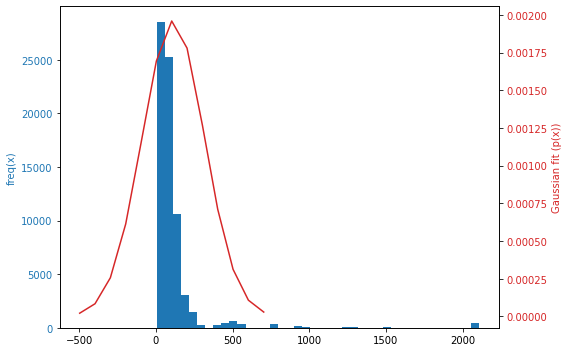

In [100]:
from scipy.stats import norm
fig, ax1 = plt.subplots(figsize=(8, 5))

color = 'tab:blue'
ax1.set_ylabel('freq(x)', color=color)  # we already handled the x-label with ax1
ax1.hist(sample['price'], bins=40, color=color)
ax1.tick_params(axis='y', labelcolor=color)


# plot the gaussian fit
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Gaussian fit (p(x))', color=color)
ax2.plot(x_axis, [norm.pdf(x, price_mean, price_std) for x in x_axis], color=color)#Probability density function of normal distribution at x of the given mean,& std deviation
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()
plt.show()

# Spatial distribution of the orders

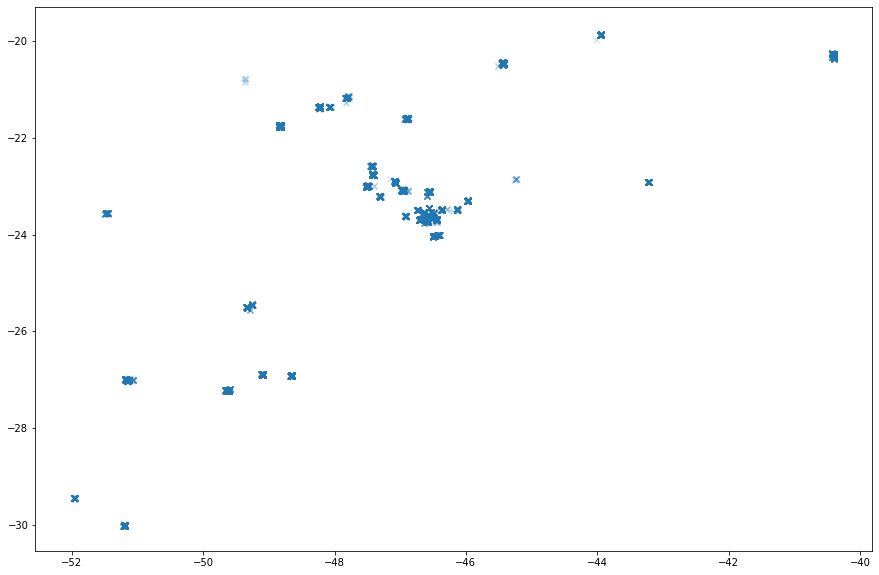

In [90]:
plt.figure(figsize=(15,10))
plt.scatter(sample['geolocation_lng'], sample['geolocation_lat'], marker='x', alpha=0.1)
plt.show()



In [ ]:
# I'm trying to plot the latitude & longitudes in the brazilian map. Please do it if you can.
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap


def make_map():
    fig, ax = plt.subplots()
    m = Basemap(projection='merc', llcrnrlat=-35, urcrnrlat=7,
                llcrnrlon=-77, urcrnrlon=-32, resolution='i')
    m.ax = ax
    m.fillcontinents()
    return fig, m